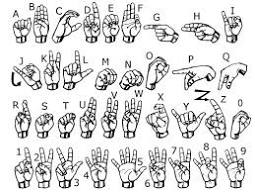

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import keras
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
model=keras.models.load_model('ASL_model.h5')
dict_={'0': 0,'1': 1,'2': 2,'3': 3,'4': 4,'5': 5,'6': 6,'7': 7,'8': 8,
 '9': 9,'a': 10,'b': 11,'c': 12,'d': 13,'e': 14,'f': 15,'g': 16,'h': 17,
 'i': 18,'j': 19,'k': 20,'l': 21,'m': 22,'n': 23,'o': 24,'p': 25,'q': 26,
 'r': 27,'s': 28,'t': 29,'u': 30,'v': 31,'w': 32,'x': 33,'y': 34,'z': 35}
def get_Name(N):
    for x,y in dict_.items():
        if y==N:
            return x
def Prediction(image):
    image=preprocess_input(image)
    predictions=model.predict([image])
    N=np.argmax(predictions,axis=1)
    return get_Name(int(N))

In [3]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.5)

In [4]:
cap=cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 700)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 700)
while True:
    ret,frame=cap.read()
    x_=[]
    y_=[]
    if ret:
        H, W, _ = frame.shape
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_copy=frame.copy()
        results = hands.process(frame_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    frame,  
                    hand_landmarks, 
                    mp_hands.HAND_CONNECTIONS,  
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    x_.append(x)
                    y_.append(y)
            x1 = int(min(x_) )-20
            y1 = int(min(y_) )-20
            x2 = int(max(x_) )+20
            y2 = int(max(y_) )+20
            image=frame_copy[y1:y2,x1:x2]
            image=cv2.resize(image,(224,224))
            image = np.expand_dims(image, axis=0)
            pred=Prediction(image)
            text='Letter '+pred
            cv2.rectangle(frame,(x1, y1),(x2, y2),[0,0,255],2)
            cv2.putText(frame,text,(x1+5,y1-5),cv2.FONT_HERSHEY_SIMPLEX,.5,[0,0,255],1)
            cv2.rectangle(frame,(x1, y1),(x2, y1-20),[0,0,255],2)
    cv2.imshow('Frame',frame)
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
